In [ ]:
!pip install numpy==2.2.3 pandas==2.2.3 scikit-learn==1.6.1 matplotlib==3.10.1 seaborn==0.13.2 hmmlearn==0.3.3 pgmpy==0.1.26 medmnist==3.0.2

In [1]:
from medmnist import PneumoniaMNIST
import numpy as np
from medmnist import PneumoniaMNIST
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import pandas as pd

/Users/twang/HCMUT/HK242/CO3117/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = PneumoniaMNIST(split="train",download=True)
train_dataset = PneumoniaMNIST(split='train', download=True)
test_dataset = PneumoniaMNIST(split='test', download=True)

# Assume train_dataset.imgs is a numpy array of shape (N, H, W, C)
x_train = train_dataset.imgs.astype('float32') / 255.0
y_train = train_dataset.labels.flatten()

x_test = test_dataset.imgs.astype('float32') / 255.0
y_test = test_dataset.labels.flatten()

# Flatten images for traditional model
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

Training data shape: (4708, 784)
Test data shape: (624, 784)
Number of classes: 2
Reducing dimensionality with PCA to 50 components...
Reduced data shape: (4708, 50)
Explained variance ratio: 0.9332
Discretizing features...
Dataframes created:
Training data shape: (4708, 51)
Test data shape: (624, 51)

Training data preview:
   F0  F1  F2  F3  F4  F5  F6  F7  F8  F9  ...  F41  F42  F43  F44  F45  F46  \
0   5   3   0   6   5   1   7   3   0   9  ...    9    0    5    9    7    5   
1   7   3   8   5   5   0   3   2   3   6  ...    3    1    4    8    1    3   
2   8   1   4   7   5   8   0   1   8   6  ...    4    9    3    8    9    6   
3   2   9   2   4   6   6   8   5   9   4  ...    5    3    6    7    6    7   
4   8   6   6   7   6   4   7   3   8   3  ...    8    8    4    6    8    2   

   F47  F48  F49  pneumonia  
0    7    7    0          1  
1    0    9    6          1  
2    3    8    0          1  
3    4    8    7          1  
4    5    3    1          1  

[5 rows x 5

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it

Inference time: 5.85 seconds for 624 samples

Accuracy on test data: 0.8510


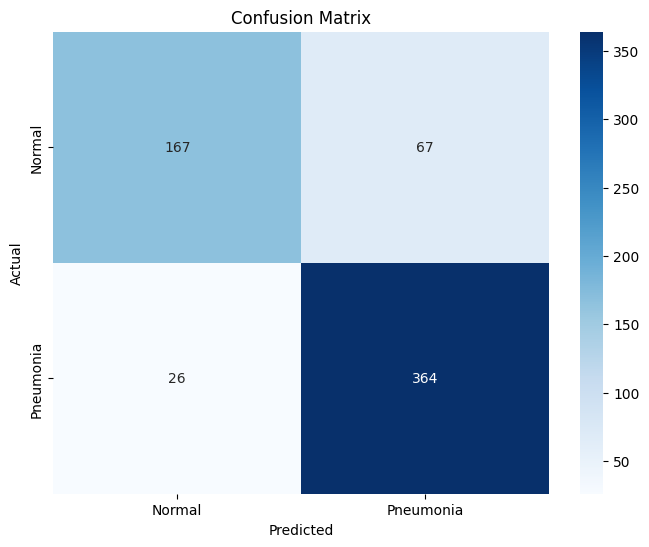


Classification Report:
              precision    recall  f1-score   support

      Normal       0.87      0.71      0.78       234
   Pneumonia       0.84      0.93      0.89       390

    accuracy                           0.85       624
   macro avg       0.85      0.82      0.83       624
weighted avg       0.85      0.85      0.85       624


Bayesian Network analysis completed!


In [44]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.inference import VariableElimination
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

x_train = train_dataset.imgs.astype('float32') / 255.0
y_train = train_dataset.labels.flatten()

x_test = test_dataset.imgs.astype('float32') / 255.0
y_test = test_dataset.labels.flatten()

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print(f"Training data shape: {x_train_flat.shape}")
print(f"Test data shape: {x_test_flat.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

n_samples = 999999999999  
if len(x_train_flat) > n_samples:
    idx = np.random.choice(len(x_train_flat), n_samples, replace=False)
    x_train_subset = x_train_flat[idx]
    y_train_subset = y_train[idx]
else:
    x_train_subset = x_train_flat
    y_train_subset = y_train

n_components = 50  
print(f"Reducing dimensionality with PCA to {n_components} components...")
pca = PCA(n_components=n_components)
x_train_reduced = pca.fit_transform(x_train_subset)
x_test_reduced = pca.transform(x_test_flat)

print(f"Reduced data shape: {x_train_reduced.shape}")
print(f"Explained variance ratio: {sum(pca.explained_variance_ratio_):.4f}")

n_bins = 10  
print("Discretizing features...")
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
x_train_discrete = discretizer.fit_transform(x_train_reduced)
x_test_discrete = discretizer.transform(x_test_reduced)

x_train_discrete = x_train_discrete.astype(int)
x_test_discrete = x_test_discrete.astype(int)
y_train_discrete = y_train_subset.astype(int)
y_test_discrete = y_test.astype(int)

feature_names = [f'F{i}' for i in range(n_components)]
column_names = feature_names + ['pneumonia']

train_data = np.column_stack((x_train_discrete, y_train_discrete))
train_df = pd.DataFrame(train_data, columns=column_names)

test_data = np.column_stack((x_test_discrete, y_test_discrete))
test_df = pd.DataFrame(test_data, columns=column_names)

print("Dataframes created:")
print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")
print("\nTraining data preview:")
print(train_df.head())

print("\nDefining Bayesian Network structure...")

edges = []
for feature in feature_names:
    edges.append(('pneumonia', feature))

model = BayesianNetwork(edges)

start_time = time.time()
print("\nEstimating model parameters (this may take a while)...")
try:
    model.fit(train_df, estimator=BayesianEstimator, prior_type='BDeu')
    print("Model training completed using BayesianEstimator!")
except Exception as e:
    print(f"Error with BayesianEstimator: {e}")
    print("Falling back to MaximumLikelihoodEstimator...")
    model.fit(train_df, estimator=MaximumLikelihoodEstimator)
    print("Model training completed using MaximumLikelihoodEstimator!")

training_time = time.time() - start_time
print(f"Training time: {training_time:.2f} seconds")

try:
    model.check_model()
    print("Model is valid.")
except Exception as e:
    print(f"Warning: Model check failed: {e}")

print("\nSample of learned probabilities:")
for cpd in model.get_cpds()[:2]:  
    print(f"CPD of {cpd.variable}:")
    print(cpd)

inference = VariableElimination(model)

start_time = time.time()
print("\nMaking predictions on test data...")
predictions = []

max_test_samples = 99999999999
test_indices = range(min(len(test_df), max_test_samples))

for i in test_indices:
    evidence = {f'F{j}': test_df.iloc[i][f'F{j}'] for j in range(n_components)}
    try:
        query_result = inference.map_query(variables=['pneumonia'], evidence=evidence)
        predictions.append(query_result['pneumonia'])
    except Exception as e:
        print(f"Error in prediction for sample {i}: {e}")
        predictions.append(np.random.choice([0, 1]))

inference_time = time.time() - start_time
print(f"Inference time: {inference_time:.2f} seconds for {len(test_indices)} samples")

actual_labels = test_df.iloc[test_indices]['pneumonia'].values
accuracy = accuracy_score(actual_labels, predictions)
print(f"\nAccuracy on test data: {accuracy:.4f}")

cm = confusion_matrix(actual_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Pneumonia'],
            yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(actual_labels, predictions, 
                          target_names=['Normal', 'Pneumonia']))

print("\nBayesian Network analysis completed!")


# Augmentated Naive Bayes

Training data shape: (4708, 784)
Test data shape: (624, 784)
Number of classes: 2
Reducing dimensionality with PCA to 50 components...
Reduced data shape: (4708, 50)
Explained variance ratio: 0.9332
Discretizing features...
Dataframes created:
Training data shape: (4708, 51)
Test data shape: (624, 51)

Training data preview:
   F0  F1  F2  F3  F4  F5  F6  F7  F8  F9  ...  F41  F42  F43  F44  F45  F46  \
0   5   3   0   6   5   1   7   3   0   9  ...    9    0    5    9    6    6   
1   7   3   8   5   5   0   3   2   3   6  ...    3    1    4    8    1    3   
2   8   1   4   7   5   8   0   1   8   6  ...    4    9    3    8    9    6   
3   2   9   2   4   6   6   8   5   9   4  ...    5    3    6    7    6    7   
4   8   6   6   7   6   4   7   3   8   3  ...    8    9    4    6    8    2   

   F47  F48  F49  pneumonia  
0    6    8    0          1  
1    0    9    6          1  
2    4    8    4          1  
3    4    7    8          1  
4    5    3    5          1  

[5 rows x 5

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it

Inference time: 6.72 seconds for 624 samples

Accuracy on test data: 0.8494


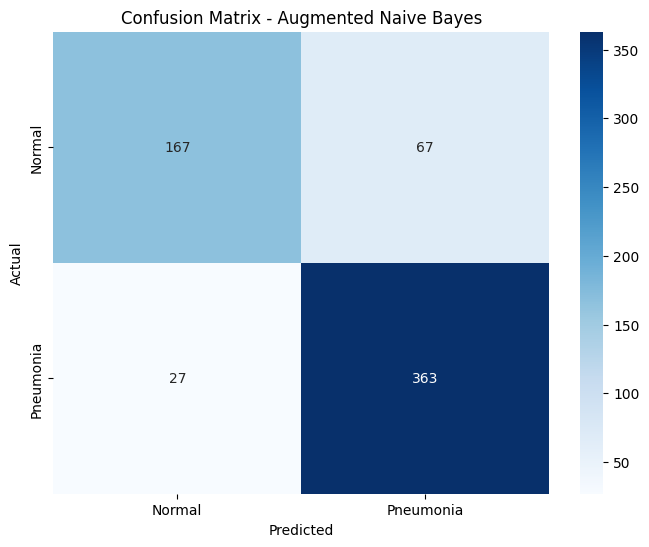


Classification Report:
              precision    recall  f1-score   support

      Normal       0.86      0.71      0.78       234
   Pneumonia       0.84      0.93      0.89       390

    accuracy                           0.85       624
   macro avg       0.85      0.82      0.83       624
weighted avg       0.85      0.85      0.85       624


Augmented Naive Bayes Network analysis completed!


In [43]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.inference import VariableElimination
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

x_train = train_dataset.imgs.astype('float32') / 255.0
y_train = train_dataset.labels.flatten()

x_test = test_dataset.imgs.astype('float32') / 255.0
y_test = test_dataset.labels.flatten()

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print(f"Training data shape: {x_train_flat.shape}")
print(f"Test data shape: {x_test_flat.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

n_samples = 999999999999  
if len(x_train_flat) > n_samples:
    idx = np.random.choice(len(x_train_flat), n_samples, replace=False)
    x_train_subset = x_train_flat[idx]
    y_train_subset = y_train[idx]
else:
    x_train_subset = x_train_flat
    y_train_subset = y_train

n_components = 50  
print(f"Reducing dimensionality with PCA to {n_components} components...")
pca = PCA(n_components=n_components)
x_train_reduced = pca.fit_transform(x_train_subset)
x_test_reduced = pca.transform(x_test_flat)

print(f"Reduced data shape: {x_train_reduced.shape}")
print(f"Explained variance ratio: {sum(pca.explained_variance_ratio_):.4f}")

n_bins = 10  
print("Discretizing features...")
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
x_train_discrete = discretizer.fit_transform(x_train_reduced)
x_test_discrete = discretizer.transform(x_test_reduced)

x_train_discrete = x_train_discrete.astype(int)
x_test_discrete = x_test_discrete.astype(int)
y_train_discrete = y_train_subset.astype(int)
y_test_discrete = y_test.astype(int)

feature_names = [f'F{i}' for i in range(n_components)]
column_names = feature_names + ['pneumonia']

train_data = np.column_stack((x_train_discrete, y_train_discrete))
train_df = pd.DataFrame(train_data, columns=column_names)

test_data = np.column_stack((x_test_discrete, y_test_discrete))
test_df = pd.DataFrame(test_data, columns=column_names)

print("Dataframes created:")
print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")
print("\nTraining data preview:")
print(train_df.head())

print("\nDefining Augmented Naive Bayes Network structure...")

edges = []
for feature in feature_names:
    edges.append(('pneumonia', feature))

corr_matrix = train_df[feature_names].corr().abs()
threshold = 0.5  
for i in range(n_components):
    for j in range(i+1, n_components):
        if corr_matrix.iloc[i, j] > threshold:
            edges.append((f'F{i}', f'F{j}'))

print(f"Created {len(edges)} edges for Augmented Naive Bayes")
print(f"Sample edges: {edges[:10]}...")

model = BayesianNetwork(edges)

start_time = time.time()
print("\nEstimating model parameters (this may take a while)...")
try:
    model.fit(train_df, estimator=BayesianEstimator, prior_type='BDeu')
    print("Model training completed using BayesianEstimator!")
except Exception as e:
    print(f"Error with BayesianEstimator: {e}")
    print("Falling back to MaximumLikelihoodEstimator...")
    model.fit(train_df, estimator=MaximumLikelihoodEstimator)
    print("Model training completed using MaximumLikelihoodEstimator!")

training_time = time.time() - start_time
print(f"Training time: {training_time:.2f} seconds")

try:
    model.check_model()
    print("Model is valid.")
except Exception as e:
    print(f"Warning: Model check failed: {e}")

print("\nSample of learned probabilities:")
for cpd in model.get_cpds()[:2]:  
    print(f"CPD of {cpd.variable}:")
    print(cpd)

inference = VariableElimination(model)

start_time = time.time()
print("\nMaking predictions on test data...")
predictions = []

max_test_samples = 99999999999
test_indices = range(min(len(test_df), max_test_samples))

for i in test_indices:
    evidence = {f'F{j}': test_df.iloc[i][f'F{j}'] for j in range(n_components)}
    try:
        query_result = inference.map_query(variables=['pneumonia'], evidence=evidence)
        predictions.append(query_result['pneumonia'])
    except Exception as e:
        print(f"Error in prediction for sample {i}: {e}")
        predictions.append(np.random.choice([0, 1]))

inference_time = time.time() - start_time
print(f"Inference time: {inference_time:.2f} seconds for {len(test_indices)} samples")

actual_labels = test_df.iloc[test_indices]['pneumonia'].values
accuracy = accuracy_score(actual_labels, predictions)
print(f"\nAccuracy on test data: {accuracy:.4f}")

cm = confusion_matrix(actual_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], 
            yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Augmented Naive Bayes')
plt.show()

print("\nClassification Report:")
print(classification_report(actual_labels, predictions, target_names=['Normal', 'Pneumonia']))

print("\nAugmented Naive Bayes Network analysis completed!")


# Hidden Markov Model

Training data shape: (4708, 784)
Test data shape: (624, 784)
Number of classes: 2
Reducing dimensionality with PCA to 50 components...
Reduced data shape: (4708, 50)
Explained variance ratio: 0.9332
Discretizing features...
Discretized data created:
Training data shape: (4708, 50)
Test data shape: (624, 50)
Defining Hidden Markov Model structure...

Training HMM models for each class (this may take a while)...
Training model for class 0...
Model for class 0 trained successfully
Training model for class 1...
Model for class 1 trained successfully
Training time: 12.75 seconds

Making predictions on test data...
Inference time: 0.09 seconds for 624 samples

Accuracy on test data: 0.7163


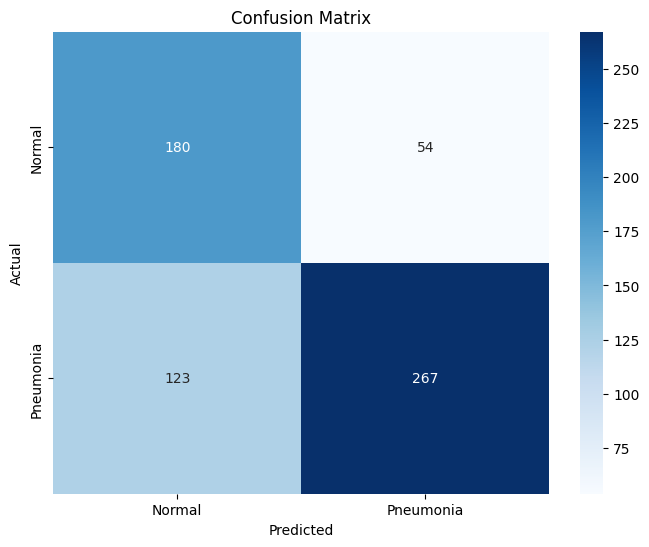


Classification Report:
              precision    recall  f1-score   support

      Normal       0.59      0.77      0.67       234
   Pneumonia       0.83      0.68      0.75       390

    accuracy                           0.72       624
   macro avg       0.71      0.73      0.71       624
weighted avg       0.74      0.72      0.72       624


Hidden Markov Model analysis completed!


In [42]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from hmmlearn import hmm

x_train = train_dataset.imgs.astype('float32') / 255.0
y_train = train_dataset.labels.flatten()

x_test = test_dataset.imgs.astype('float32') / 255.0
y_test = test_dataset.labels.flatten()

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print(f"Training data shape: {x_train_flat.shape}")
print(f"Test data shape: {x_test_flat.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

n_samples = 999999999999  
if len(x_train_flat) > n_samples:
    idx = np.random.choice(len(x_train_flat), n_samples, replace=False)
    x_train_subset = x_train_flat[idx]
    y_train_subset = y_train[idx]
else:
    x_train_subset = x_train_flat
    y_train_subset = y_train

n_components = 50
print(f"Reducing dimensionality with PCA to {n_components} components...")
pca = PCA(n_components=n_components)
x_train_reduced = pca.fit_transform(x_train_subset)
x_test_reduced = pca.transform(x_test_flat)

print(f"Reduced data shape: {x_train_reduced.shape}")
print(f"Explained variance ratio: {sum(pca.explained_variance_ratio_):.4f}")

n_bins = 10
print("Discretizing features...")
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
x_train_discrete = discretizer.fit_transform(x_train_reduced)
x_test_discrete = discretizer.transform(x_test_reduced)

x_train_discrete = x_train_discrete.astype(int)
x_test_discrete = x_test_discrete.astype(int)
y_train_discrete = y_train_subset.astype(int)
y_test_discrete = y_test.astype(int)

print("Discretized data created:")
print(f"Training data shape: {x_train_discrete.shape}")
print(f"Test data shape: {x_test_discrete.shape}")

print("Defining Hidden Markov Model structure...")

classes = np.unique(y_train_discrete)
n_classes = len(classes)
n_hidden_states = 8 

models = {}
start_time = time.time()
print("\nTraining HMM models for each class (this may take a while)...")

for c in classes:
    print(f"Training model for class {c}...")
    class_data = x_train_discrete[y_train_discrete == c]
    
    model = hmm.GaussianHMM(
        n_components=n_hidden_states,
        covariance_type="diag",
        n_iter=20,
        init_params="",
        params="mct",
        random_state=42
    )
    
    model.startprob_ = np.ones(n_hidden_states) / n_hidden_states
    model.transmat_ = np.ones((n_hidden_states, n_hidden_states)) / n_hidden_states
    
    try:
        lengths = [n_components] * class_data.shape[0]
        flat_data = class_data.reshape(-1, 1)
        
        model.fit(flat_data, lengths)
        models[c] = model
        print(f"Model for class {c} trained successfully")
    except Exception as e:
        print(f"Error training model for class {c}: {e}")
        
        try:
            print("Trying simpler approach...")
            means = np.mean(class_data, axis=0)
            covs = np.cov(class_data, rowvar=False)
            
            model = hmm.GaussianHMM(
                n_components=1,
                covariance_type="full",
                n_iter=5
            )
            model.startprob_ = np.array([1.0])
            model.transmat_ = np.array([[1.0]])
            model.means_ = means.reshape(1, -1)
            
            model.covars_ = np.diag(np.diag(covs)).reshape(1, n_components, n_components)
            
            models[c] = model
            print(f"Simple model for class {c} created")
        except Exception as e2:
            print(f"Simple approach failed: {e2}")

training_time = time.time() - start_time
print(f"Training time: {training_time:.2f} seconds")

start_time = time.time()
print("\nMaking predictions on test data...")
predictions = []

for i in range(len(x_test_discrete)):
    sample = x_test_discrete[i]
    
    log_probs = {}
    for c, model in models.items():
        try:
            sample_reshaped = sample.reshape(-1, 1)
            log_probs[c] = model.score(sample_reshaped, [len(sample)])
        except Exception as e:
            try:
                mean_vec = model.means_[0]
                log_probs[c] = -np.sum((sample - mean_vec) ** 2)
            except:
                print(f"Error in prediction for sample {i}, class {c}: {e}")
                log_probs[c] = -np.inf
    
    if log_probs:
        predictions.append(max(log_probs, key=log_probs.get))
    else:
        predictions.append(np.random.choice(classes))

inference_time = time.time() - start_time
print(f"Inference time: {inference_time:.2f} seconds for {len(x_test_discrete)} samples")

actual_labels = y_test_discrete
accuracy = accuracy_score(actual_labels, predictions)
print(f"\nAccuracy on test data: {accuracy:.4f}")

cm = confusion_matrix(actual_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Normal', 'Pneumonia'], 
           yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(actual_labels, predictions, target_names=['Normal', 'Pneumonia']))

print("\nHidden Markov Model analysis completed!")
